<a href="https://colab.research.google.com/github/mediatar/hylia/blob/master/Part_1_RAG_using_OpenAI_Assistants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1 - Demonstration of Retrieval-Augmented Generation (RAG) using OpenAI Assistants
This demonstrates how to utilize the new OpenAI [Assistants](https://platform.openai.com/docs/assistants/overview) capabilitiess announced at the [OpenAI Devdays conference](https://devday.openai.com/) on November 6th, 2023.


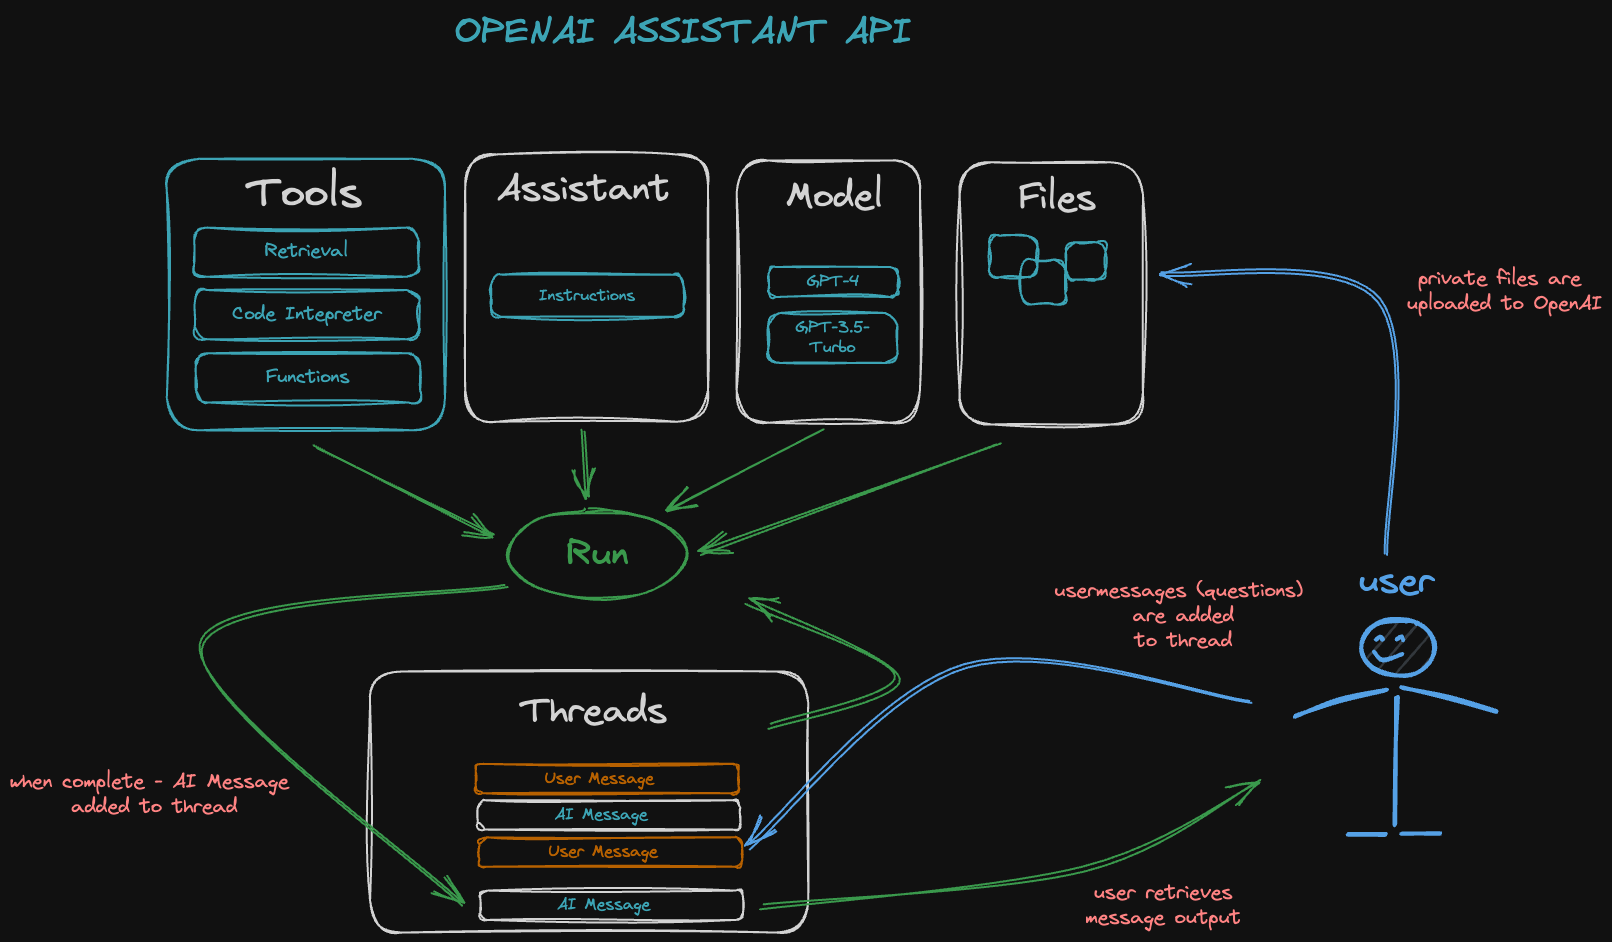

## SETUP

In [ ]:
!pip install cohere tiktoken openai >>null

In [ ]:
from pprint import pprint
import json
import time
from openai import OpenAI

### OpenAI API Keys

[OpenAI Keys](https://platform.openai.com/api-keys)
[OpenAI Platform](https://platform.openai.com/apps)

In [ ]:
openai_key="sk-########"
org_ID="org-####"

### Create the OpenAI Client

In [ ]:
client=OpenAI(
    organization=org_ID,
    api_key=openai_key
)

## Step 1 - Upload your Knowledgebase files to OpenAI

Upload Limits:


*   File Size: 512MB
*   Max Storage: 100GB



In [ ]:
!mkdir -p ./data
!wget -O /content/data/tv-manual.pdf -q https://www.vizio.com/content/dam/asset-portal/us/en/2022/tv/documentation/v-series/V-Series_UM_EN.pdf

In [ ]:
#Run this ones to upload a file
file = client.files.create(
    file=open("/content/data/tv-manual.pdf", "rb"),
    purpose='assistants'
)



In [ ]:
#Call this to get the list of all uploaded files
file_list = client.files.list()
print(file_list)

SyncPage[FileObject](data=[FileObject(id='file-2Y9LrUAHiKzQnC55ZwOc2koN', bytes=7675881, created_at=1700151384, filename='tv-manual.pdf', object='file', purpose='assistants', status='processed', status_details=None)], object='list', has_more=False)


[Your OpenAI files](https://platform.openai.com/files)

In [ ]:
#Grab the ID of the TV Manual uploaded earlier
file_id = file_list.data[0].id
print(file_id)

file-2Y9LrUAHiKzQnC55ZwOc2koN


## Step 2 - Create the assistant and grant access to the files

In [ ]:
#call this once to create the assistant
assistant = client.beta.assistants.create (
    name = "Vizio TV Chatbot",
    instructions="You are a chatbot designed to respond to inquires about the Vizio V Series Televisions, Models: V435M-K04, V505M-K09, V555M-K01, V585M-K01, V655M-K03, V655M-K04, V705M-K03 & V755M-K03",
    model = "gpt-4-1106-preview",
    tools = [{'type': 'retrieval'}],
    file_ids=[file_id]
)

print(assistant)

Assistant(id='asst_bvxgYlIDNLQsWkYzDFzfszMt', created_at=1700153843, description=None, file_ids=['file-2Y9LrUAHiKzQnC55ZwOc2koN'], instructions='You are a chatbot designed to respond to inquires about the Vizio V Series Televisions, Models: V435M-K04, V505M-K09, V555M-K01, V585M-K01, V655M-K03, V655M-K04, V705M-K03 & V755M-K03', metadata={}, model='gpt-4-1106-preview', name='Vizio TV Chatbot', object='assistant', tools=[ToolRetrieval(type='retrieval')])


[Your Assistants Can be found here on the OpenAI Website](https://platform.openai.com/assistants)

In [ ]:
#call this anytime you want to update an existing assistant
assistant = client.beta.assistants.update (
    "asst_JjruaBK19uVWwDmZgGwVNUvO",
    name = "Vizio TV Chatbot",
    instructions="You are a chatbot designed to respond to inquires about the Vizio V Series Televisions, Models: V435M-K04, V505M-K09, V555M-K01, V585M-K01, V655M-K03, V655M-K04, V705M-K03 & V755M-K03",
    #model = "gpt-3.5-turbo-1106",
    model = "gpt-4-1106-preview",
    tools = [{'type': 'retrieval'}],
    file_ids=[file_id]
)

print(assistant)

Assistant(id='asst_JjruaBK19uVWwDmZgGwVNUvO', created_at=1700151865, description=None, file_ids=['file-2Y9LrUAHiKzQnC55ZwOc2koN'], instructions='You are a chatbot designed to respond to inquires about the Vizio V Series Televisions, Models: V435M-K04, V505M-K09, V555M-K01, V585M-K01, V655M-K03, V655M-K04, V705M-K03 & V755M-K03', metadata={}, model='gpt-4-1106-preview', name='Vizio TV Chatbot', object='assistant', tools=[ToolRetrieval(type='retrieval')])


In [ ]:
#to retrieve all your defined assistants
my_assistants = client.beta.assistants.list(
    order="desc",
    limit = "20"
)

pprint(my_assistants.data)

[Assistant(id='asst_bvxgYlIDNLQsWkYzDFzfszMt', created_at=1700153843, description=None, file_ids=['file-2Y9LrUAHiKzQnC55ZwOc2koN'], instructions='You are a chatbot designed to respond to inquires about the Vizio V Series Televisions, Models: V435M-K04, V505M-K09, V555M-K01, V585M-K01, V655M-K03, V655M-K04, V705M-K03 & V755M-K03', metadata={}, model='gpt-4-1106-preview', name='Vizio TV Chatbot', object='assistant', tools=[ToolRetrieval(type='retrieval')])]


##Step 3 - Create an empty thread

In [ ]:
thread = client.beta.threads.create()

In [ ]:
print(thread)

Thread(id='thread_SVFqUDFa8oMJqCyWdWvUBeh1', created_at=1700154040, metadata={}, object='thread')


##Step 4 - Add a user message to the thread

In [ ]:
message = client.beta.threads.messages.create(
    thread_id = thread.id,
    role = 'user',
    content='What is the power consumption of the V585M-K01 model Vizio TV'
)
print(message)

ThreadMessage(id='msg_c46R6Ztw55r4JQWMojSllPDx', assistant_id=None, content=[MessageContentText(text=Text(annotations=[], value='What is the power consumption of the V585M-K01 model Vizio TV'), type='text')], created_at=1700154402, file_ids=[], metadata={}, object='thread.message', role='user', run_id=None, thread_id='thread_SVFqUDFa8oMJqCyWdWvUBeh1')


##Step 5 - Run the assistant to get back a response

In [ ]:
run = client.beta.threads.runs.create(
    thread_id = thread.id,
    assistant_id = assistant.id,
    instructions = "Please address the user as Bob.  Do not provide an answer to the question if the information was not retrieved from the knowledge base. "
)

print(run.id)

run_A5JOJH9KisEFliem9L8YQQHF


##Step 6 - Retrieve the Run Status

In [ ]:
run = client.beta.threads.runs.retrieve(
    thread_id = thread.id,
    run_id = run.id
)

print(run.status)

completed


In [ ]:
while run.status not in ["completed", "failed"]:
  run = client.beta.threads.runs.retrieve(
    thread_id = thread.id,
    run_id = run.id
  )

  print(run.status)
  time.sleep(10)

in_progress
completed


In [ ]:
messages = client.beta.threads.messages.list(
    thread_id = thread.id,

)

for each in messages:
  pprint(each.role + ":" + each.content[0].text.value)

('assistant:The power consumption of the Vizio TV model V585M-K01 is 94.14 '
 'watts【14†source】.')
'user:What is the power consumption of the V585M-K01 model Vizio TV'
('assistant:The viewable area of the Vizio TV model V585M-K01 is 57.5 '
 'inches【7†source】.')
'user:What is the viewable area of the V585M-K01 model Vizio TV'


## POST Demo Cleanup
Delete your assistant and any files that you uploaded


In [ ]:
response = client.beta.assistants.delete(assistant.id)
print(response)

AssistantDeleted(id='asst_bvxgYlIDNLQsWkYzDFzfszMt', deleted=True, object='assistant.deleted')


In [ ]:
response = client.files.delete(file.id)
print(response)

FileDeleted(id='file-2Y9LrUAHiKzQnC55ZwOc2koN', deleted=True, object='file')
